#IS 670 Lab 4: Decision Tree vs Naive Bayes

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

###1. Upload and clean data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB

In [26]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_Vishakha/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [27]:
car_kick.keys()

Index(['PurchDate', 'VehYear', 'VehicleAge', 'VehOdo',
       'MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice',
       'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
       'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice',
       'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice',
       'VehBCost', 'WarrantyCost', 'Auction', 'Make', 'Model', 'Trim',
       'SubModel', 'Color', 'Transmission', 'WheelTypeID', 'WheelType',
       'Nationality', 'Size', 'TopThreeAmericanName', 'BYRNO', 'VNZIP1',
       'VNST', 'IsOnlineSale', 'IsBadBuy'],
      dtype='object')

In [28]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [7]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [8]:
# Show the head rows of a data frame
carAuction.head()

,Auction,Color,IsBadBuy,MMRCurrentAuctionAveragePrice,Size,TopThreeAmericanName,VehBCost,VehicleAge,VehOdo,WarrantyCost,WheelType
0,MANHEIM,SILVER,No,5341,MEDIUM,CHRYSLER,6500,4,51954,1086,Covers
1,ADESA,SILVER,No,3688,MEDIUM,FORD,3680,4,89127,983,Covers
2,MANHEIM,RED,No,6868,LARGE,GM,7170,3,71271,1974,Alloy
3,MANHEIM,BLACK,No,7801,LARGE,GM,7670,2,83338,2152,Covers
4,ADESA,WHITE,No,7355,LARGE,GM,7165,2,58698,1500,Alloy


In [9]:
# Examine missing values again
carAuction.isnull().sum()

Auction                          0
Color                            0
IsBadBuy                         0
MMRCurrentAuctionAveragePrice    0
Size                             0
TopThreeAmericanName             0
VehBCost                         0
VehicleAge                       0
VehOdo                           0
WarrantyCost                     0
WheelType                        0
dtype: int64

In [10]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [11]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [12]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

In [13]:
# Display all numeric variables
carAuction.select_dtypes(include=['number'])

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost
0,5341,6500,4,51954,1086
1,3688,3680,4,89127,983
2,6868,7170,3,71271,1974
3,7801,7670,2,83338,2152
4,7355,7165,2,58698,1500
...,...,...,...,...,...
67206,6326,6680,2,56072,1086
67207,7505,8265,6,94232,909
67208,3106,4950,6,79534,1506
67209,3534,5220,7,79394,3967


In [14]:
# Display all categorical variables
carAuction.select_dtypes(include=['category'])

,Auction,Color,IsBadBuy,Size,TopThreeAmericanName,WheelType
0,MANHEIM,SILVER,No,MEDIUM,CHRYSLER,Covers
1,ADESA,SILVER,No,MEDIUM,FORD,Covers
2,MANHEIM,RED,No,LARGE,GM,Alloy
3,MANHEIM,BLACK,No,LARGE,GM,Covers
4,ADESA,WHITE,No,LARGE,GM,Alloy
...,...,...,...,...,...,...
67206,MANHEIM,RED,Yes,MEDIUM,CHRYSLER,Covers
67207,ADESA,BLACK,Yes,'MEDIUM SUV',OTHER,Alloy
67208,ADESA,GOLD,Yes,MEDIUM,GM,Alloy
67209,MANHEIM,WHITE,Yes,'MEDIUM SUV',GM,Covers


###2. Partition the data set for Decision Tree model

In [29]:
# Create dummy variables (1 pts)
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,No,3688,3680,4,89127,983,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,No,6868,7170,3,71271,1974,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,No,7801,7670,2,83338,2152,1,0,0,1,...,1,0,0,0,0,0,1,0,1,0
4,No,7355,7165,2,58698,1500,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
67207,Yes,7505,8265,6,94232,909,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
67208,Yes,3106,4950,6,79534,1506,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
67209,Yes,3534,5220,7,79394,3967,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [30]:
# Examine the porportion of target variable for data set
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

No     0.904539
Yes    0.095461
Name: IsBadBuy, dtype: float64


In [31]:
# Partition the data
predictors = carAuction.drop(['IsBadBuy'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [32]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [33]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

No     0.5
Yes    0.5
Name: IsBadBuy, dtype: float64 (8838,)


In [34]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

No     0.900962
Yes    0.099038
Name: IsBadBuy, dtype: float64


## 3. Decision Tree model prediction

In [35]:
# Build a decision tree model on training data with max_depth = 3
model_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 3)
model_DT.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.5, 0.875, 'VehicleAge <= 4.5\nentropy = 1.0\nsamples = 8838\nvalue = [4419, 4419]\nclass = No'),
 Text(0.25, 0.625, 'VehicleAge <= 2.5\nentropy = 0.958\nsamples = 4577\nvalue = [2840, 1737]\nclass = No'),
 Text(0.125, 0.375, 'VehBCost <= 6377.5\nentropy = 0.81\nsamples = 1060\nvalue = [796, 264]\nclass = No'),
 Text(0.0625, 0.125, 'entropy = 0.974\nsamples = 170\nvalue = [101, 69]\nclass = No'),
 Text(0.1875, 0.125, 'entropy = 0.759\nsamples = 890\nvalue = [695, 195]\nclass = No'),
 Text(0.375, 0.375, 'VehBCost <= 4652.5\nentropy = 0.981\nsamples = 3517\nvalue = [2044, 1473]\nclass = No'),
 Text(0.3125, 0.125, 'entropy = 0.969\nsamples = 272\nvalue = [108, 164]\nclass = Yes'),
 Text(0.4375, 0.125, 'entropy = 0.973\nsamples = 3245\nvalue = [1936, 1309]\nclass = No'),
 Text(0.75, 0.625, 'VehBCost <= 4782.5\nentropy = 0.951\nsamples = 4261\nvalue = [1579, 2682]\nclass = Yes'),
 Text(0.625, 0.375, 'WarrantyCost <= 1618.0\nentropy = 0.869\nsamples = 1411\nvalue = [410, 1001]\nclass 

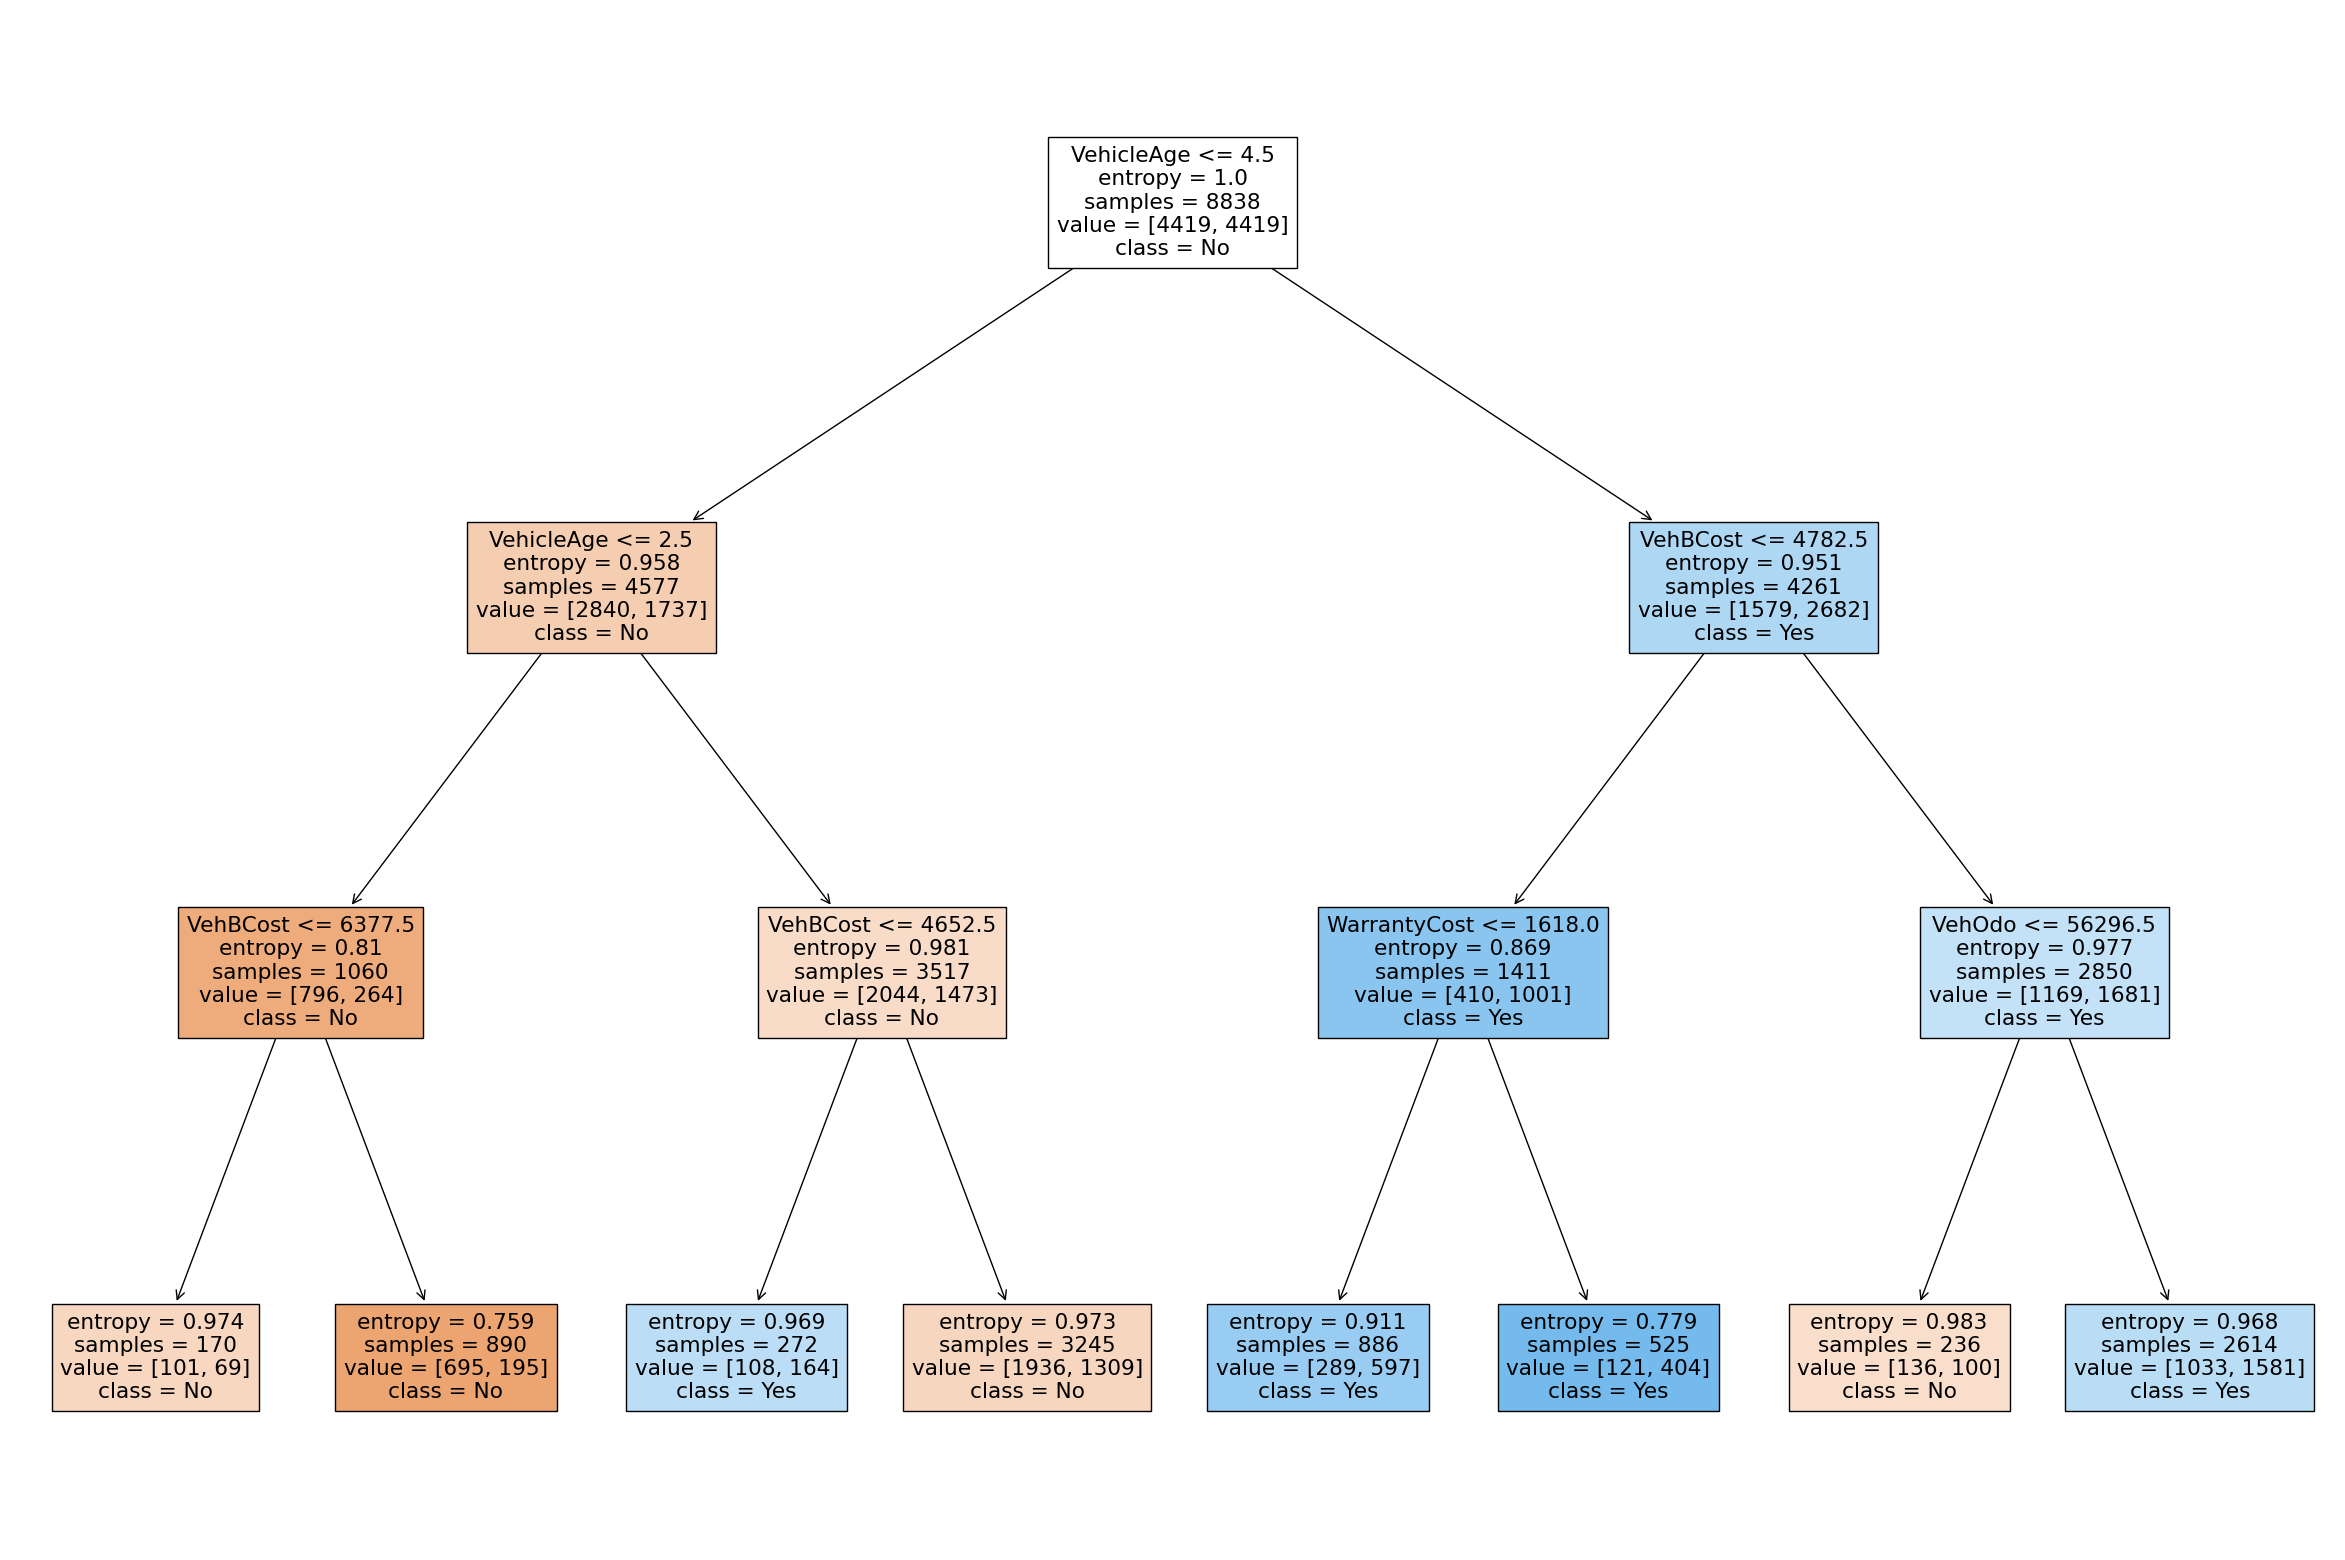

In [36]:
# Plot the tree (0.5 pts)
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_DT,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [37]:
# Text version of decision tree
print(tree.export_text(model_DT, feature_names=list(carAuction.columns)[1:]))

|--- VehicleAge <= 4.50
|   |--- VehicleAge <= 2.50
|   |   |--- VehBCost <= 6377.50
|   |   |   |--- class: No
|   |   |--- VehBCost >  6377.50
|   |   |   |--- class: No
|   |--- VehicleAge >  2.50
|   |   |--- VehBCost <= 4652.50
|   |   |   |--- class: Yes
|   |   |--- VehBCost >  4652.50
|   |   |   |--- class: No
|--- VehicleAge >  4.50
|   |--- VehBCost <= 4782.50
|   |   |--- WarrantyCost <= 1618.00
|   |   |   |--- class: Yes
|   |   |--- WarrantyCost >  1618.00
|   |   |   |--- class: Yes
|   |--- VehBCost >  4782.50
|   |   |--- VehOdo <= 56296.50
|   |   |   |--- class: No
|   |   |--- VehOdo >  56296.50
|   |   |   |--- class: Yes



In [38]:
# Make predictions on testing data
prediction_on_test_DT = model_DT.predict(predictors_test)

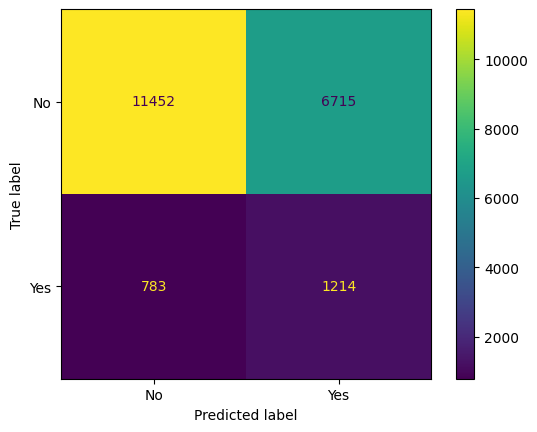

In [39]:
# Examine the evaluation results on testing data: confusion_matrix
cm_DT = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=model_DT.classes_).plot()

In [40]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

          No       0.94      0.63      0.75     18167
         Yes       0.15      0.61      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.62      0.50     20164
weighted avg       0.86      0.63      0.70     20164



## 3. Naive Bayes model prediction

In [51]:
# Build a Naive Bayes model on training data with default setting (1 point)
model_NB = MultinomialNB()
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [52]:
# Make predictions on testing data (0.5 points)
prediction_on_test_NB = model_NB.predict(predictors_test)


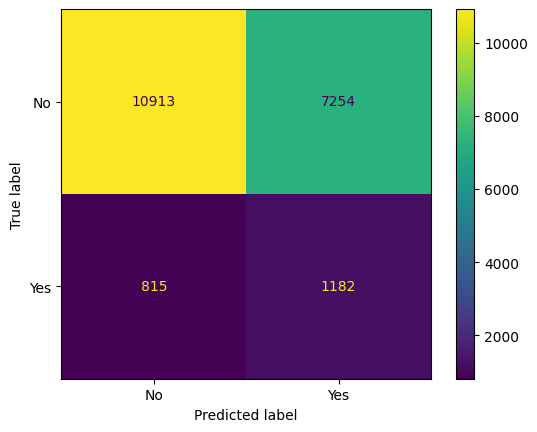

In [53]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 points)
#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()


In [54]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 point)
print(classification_report(target_test, prediction_on_test_NB))


              precision    recall  f1-score   support

          No       0.93      0.60      0.73     18167
         Yes       0.14      0.59      0.23      1997

    accuracy                           0.60     20164
   macro avg       0.54      0.60      0.48     20164
weighted avg       0.85      0.60      0.68     20164



Q1. On the testing set, how many bad buy cars are predicted as Not bad buy? (0.5 point)<br>
815 cars predicted as bad buys are anticipated to not be bad buys.

Q2. On the testing set, how many cars are predicted as Not bad buy? (0.5 point)<br>
11,782 cars are predicted to be not bad buys.

Q3. On the testing set, how many bad buy cars are identified correctly by the naive bayes model in testing data? (0.5 points)<br>
The naive Bayes model correctly identifies 1,182 cars as bad buys in the testing data.

Q4. On the testing set, if the naive bayes predicts a car as bad buy, what is the probability that such prediction is correct? (0.5 points)<br>
The probability that such a prediction is correct is 0.14.

Q5. Does the naive bayes model have better performance on majority (IsBadBuy = 'No') or minority class (IsBadBuy = 'Yes')? why?  (1 point)<br>
The precision for the minority class "NO" is lower compared to the majority class "YES" because the probability of predicting correct cases is higher for the majority class.

Q6. Compared to the naive bayes model, which model can better identify Bad Buy cars? why?  (1 points)<br>
The decision tree model may offer superior predictive capabilities compared to Naive Bayes, primarily because it demonstrates high precision for the "YES" case.

Q7. Examine which model has a better performance on the train set? Run the necessary code in the cell below, and explain here! (2 pts)
Due to its high precision and higher accuracy, the decision tree model stands out as a preferable option.

              precision    recall  f1-score   support

          No       0.61      0.61      0.61      4419
         Yes       0.61      0.60      0.60      4419

    accuracy                           0.61      8838
   macro avg       0.61      0.61      0.61      8838
weighted avg       0.61      0.61      0.61      8838

              precision    recall  f1-score   support

          No       0.63      0.65      0.64      4419
         Yes       0.64      0.62      0.63      4419

    accuracy                           0.64      8838
   macro avg       0.64      0.64      0.64      8838
weighted avg       0.64      0.64      0.64      8838



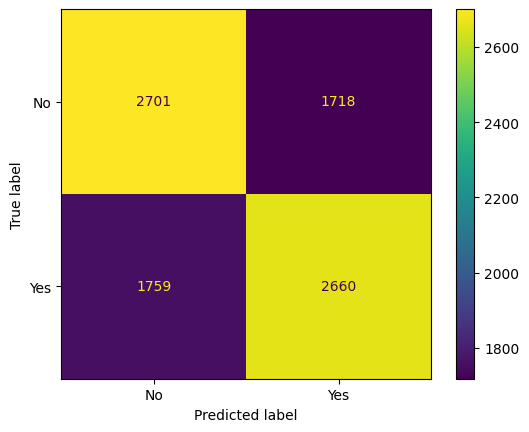

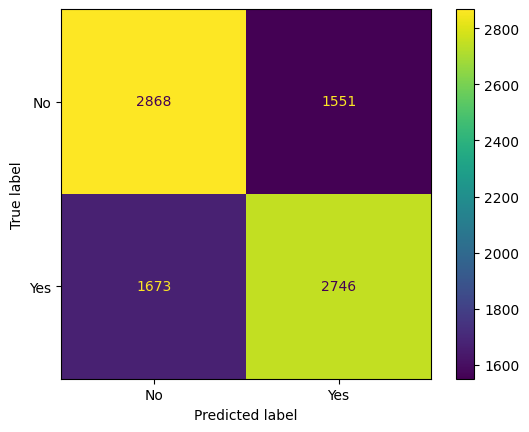

In [55]:
# Q7
predictionNaivesB = model_NB.predict(predictors_train)

NB2 = confusion_matrix(target_train, predictionNaivesB)
ConfusionMatrixDisplay(confusion_matrix=NB2, display_labels=model_NB.classes_).plot()

print(classification_report(target_train, predictionNaivesB))


DT2 = model_DT.predict(predictors_train)
decisionTreeConfusionmatrix = confusion_matrix(target_train, DT2)
ConfusionMatrixDisplay(confusion_matrix=decisionTreeConfusionmatrix, display_labels=model_DT.classes_).plot()
print(classification_report(target_train, DT2))

In [63]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/IS670_lab04.ipynb"


[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/IS670_lab04.ipynb to html
[NbConvertApp] Writing 1207210 bytes to /content/drive/MyDrive/Colab Notebooks/IS670_lab04.html
